**Title**: End to End data science application which can be leveraged by banks to assess creditworthiness, lower bad debt burden, and increase the trust in the existing data rather than document-based assessment.

**Mounting google drive to load the data from common share point**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

**Installing missingo library for visualizations**

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


**Importing necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

**Reading data into a dataframe**

In [4]:
data=pd.read_csv('/gdrive/MyDrive/Loan_Default.csv')
#data=pd.read_csv('Loan_Default.csv')

In [5]:
data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [6]:
#Displaying the top rows of the dataset
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Description of the data**

In [7]:
#Displaying the columns in the dataset
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [8]:
#shape of the dataframe
print(data.shape)
print("Number of rows in the dataframe:", data.shape[0])
print("Number of columns in the dataframe:", data.shape[1])

(148670, 34)
Number of rows in the dataframe: 148670
Number of columns in the dataframe: 34


In [9]:
#Displaying column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [10]:
#Displaying summary of numerical columns
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [11]:
#Displaying the description of all columns
data.describe(include = 'all')

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,...,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,...,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,...,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,...,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


<AxesSubplot:>

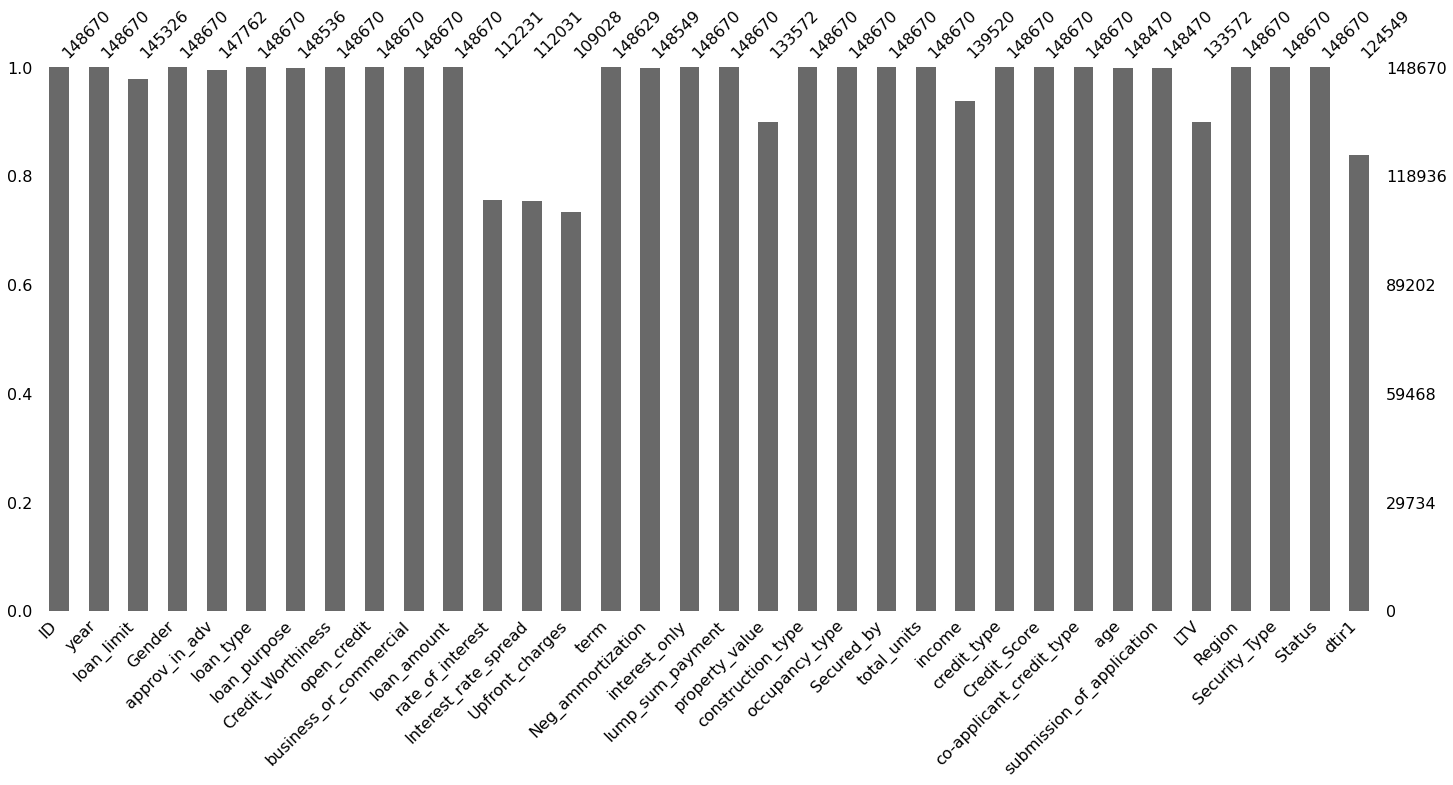

In [12]:
#Displaying the missing values in each column
msno.bar(data)

**Inferences:**

The columns rate_of_interest, interest_rate_spread, upfront_charges, property_value has missing values which can be seen as the gaps in the column bars

**Correcting column data types**

In [13]:
#cleaning of columns and chaning to appropriate data types
data1=data.copy(deep=True)
data1['Gender']=data1['Gender'].astype('category')
data1['approv_in_adv']=data1['approv_in_adv'].astype('category')
data1['loan_limit']=data1['loan_limit'].astype('category')
data1['loan_type']=data1['loan_type'].astype('category')
data1['loan_purpose']=data1['loan_purpose'].astype('category')
data1['Credit_Worthiness']=data1['Credit_Worthiness'].astype('category')
data1['open_credit']=data1['open_credit'].astype('category')
data1['business_or_commercial']=data1['business_or_commercial'].astype('category')
data1['Neg_ammortization']=data1['Neg_ammortization'].astype('category')
data1['interest_only']=data1['interest_only'].astype('category')
data1['lump_sum_payment']=data1['lump_sum_payment'].astype('category')
data1['construction_type']=data1['construction_type'].astype('category')
data1['occupancy_type']=data1['occupancy_type'].astype('category')
data1['Secured_by']=data1['Secured_by'].astype('category')
data1['total_units']=data1['total_units'].astype('category')
data1['credit_type']=data1['credit_type'].astype('category')
data1['co-applicant_credit_type']=data1['co-applicant_credit_type'].astype('category')
data1['submission_of_application']=data1['submission_of_application'].astype('category')
data1['Region']=data1['Region'].astype('category')
data1['Security_Type']=data1['Security_Type'].astype('category')



In [14]:
#5 number summary of Numerical Columns
data1.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
85%,151258.650000,2019.0,5.065000e+05,4.625000,1.025000,6221.345000,360.000000,7.580000e+05,10500.000000,840.000000,92.721519,1.000000,48.000000
95%,166125.550000,2019.0,6.565000e+05,4.990000,1.379400,9272.688500,360.000000,1.058000e+06,15420.000000,881.000000,98.728814,1.000000,54.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [15]:
#Checking the datatypes after altering
data1.dtypes

ID                              int64
year                            int64
loan_limit                   category
Gender                       category
approv_in_adv                category
loan_type                    category
loan_purpose                 category
Credit_Worthiness            category
open_credit                  category
business_or_commercial       category
loan_amount                     int64
rate_of_interest              float64
Interest_rate_spread          float64
Upfront_charges               float64
term                          float64
Neg_ammortization            category
interest_only                category
lump_sum_payment             category
property_value                float64
construction_type            category
occupancy_type               category
Secured_by                   category
total_units                  category
income                        float64
credit_type                  category
Credit_Score                    int64
co-applicant

**Cleaning the dataframe**

In [16]:
#Removing null values and displaying the results after cleaning
data1 =data1.dropna()
data1.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

**Inferences:**

All the columns has 0 missing values.

In [17]:
#Number of unique values in each column
data1.nunique()

ID                           98187
year                             1
loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      1
business_or_commercial           2
loan_amount                    173
rate_of_interest               124
Interest_rate_spread         20498
Upfront_charges              53978
term                            24
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 350
construction_type                1
occupancy_type                   3
Secured_by                       1
total_units                      4
income                         867
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
submission_of_applic

**Inferences:**

The unique values present in each column are shown against the column name

**Analyzing data distribution**

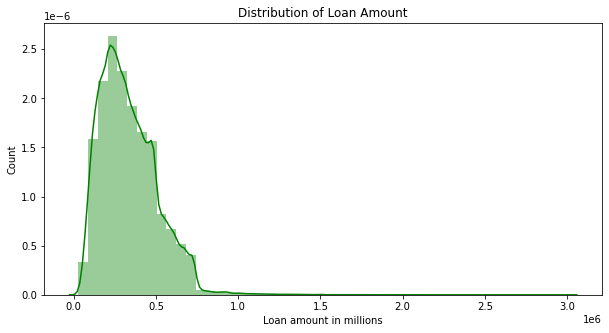

In [18]:
#Distribution of loan_amount
plt.figure(figsize=(10,5))
(sns.distplot(data1['loan_amount'],bins=50,kde=True,color = "green")).set(xlabel="Loan amount in millions", ylabel = "Count", title='Distribution of Loan Amount')
plt.show()

**Inferences:**

Most of the values of loan applications are in the ranges beween 250 K to 500 K 

<AxesSubplot:title={'center':'Distribition of loan applications by gender'}, xlabel='Gender', ylabel='Count'>

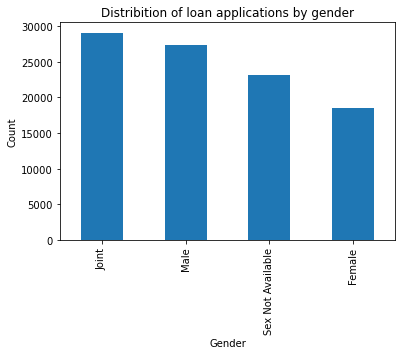

In [19]:
data1['Gender'].value_counts().plot(kind='bar',xlabel='Gender',ylabel='Count',title='Distribition of loan applications by gender')

**Inferences:**

We can infer that the joint applications (i. e., both male and female) are the highest and individually male application sare higher than females.

Text(0.5, 1.0, 'Distribution of loan applicants by credit type')

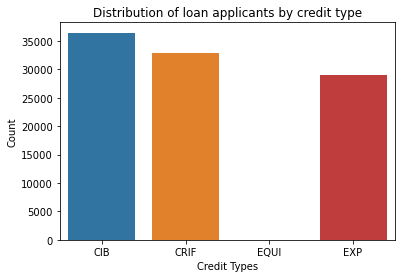

In [20]:
sns.countplot(data1['credit_type'],)
plt.xlabel('Credit Types')
plt.ylabel('Count')
plt.title('Distribution of loan applicants by credit type')

**Inferences:**

The loan applications with 'CIB' & 'CRIF' are the highest when comapred to other two types.

Text(0.5, 1.0, 'Distribution of loan applicants by occupancy type')

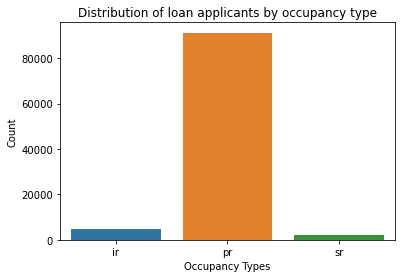

In [21]:
sns.countplot(data1['occupancy_type'])
plt.xlabel('Occupancy Types')
plt.ylabel('Count')
plt.title('Distribution of loan applicants by occupancy type')

**Inferences:**

The loan applications with occupany_type 'pr' are the highest when compared to the other types of accupancies.

ir=Industrial

pr=Personal

sr=Structural (Used for various commercial activities)

Text(0.5, 1.0, 'Distribution of loan applicants by purpose of the loan')

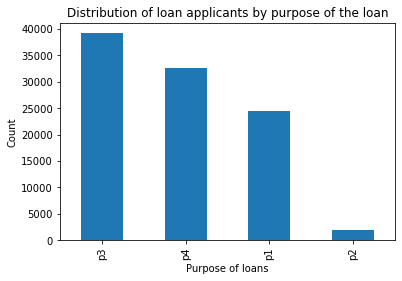

In [22]:
data1['loan_purpose'].value_counts().plot(kind='bar')
plt.xlabel('Purpose of loans')
plt.ylabel('Count')
plt.title('Distribution of loan applicants by purpose of the loan')

**Inferences:**

The purposes 'p3','p4' types are the highest among other loan applications.

p1= Commercial

p2= Structural Services

p3= Personal

p4= Industrial

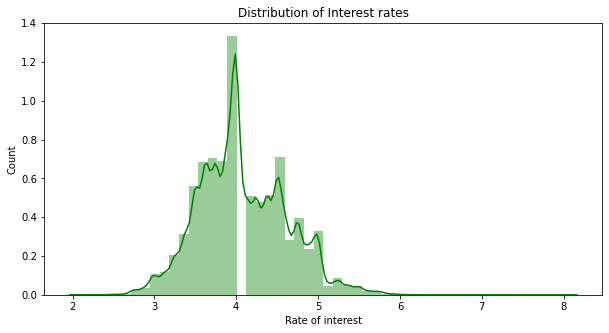

In [23]:
plt.figure(figsize=(10,5))
(sns.distplot(data1['rate_of_interest'],bins=50,kde=True,color = "green")).set(xlabel="Rate of interest", ylabel = "Count", title='Distribution of Interest rates')
plt.show()

**Inferences:**

The interest rates for most of the loans are in the range between 3 and 5.

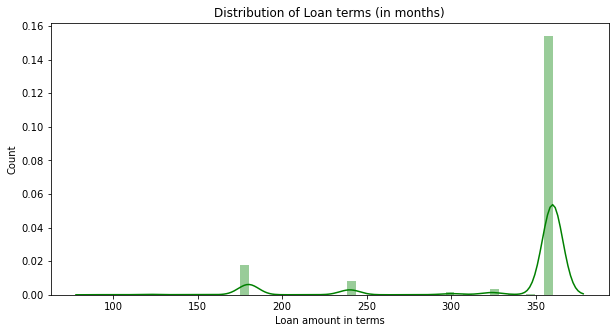

In [24]:
plt.figure(figsize=(10,5))
(sns.distplot(data1['term'],bins=50,kde=True,color = "green")).set(xlabel="Loan amount in terms", ylabel = "Count", title='Distribution of Loan terms (in months)')
plt.show()

**Inferences:**

Most of the loan terms are in the range of 300 to 400   

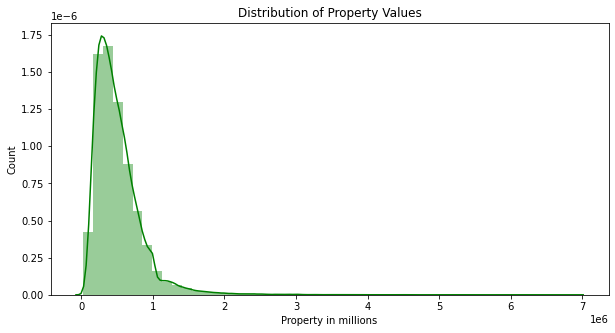

In [25]:
plt.figure(figsize=(10,5))
(sns.distplot(data1['property_value'],bins=50,kde=True,color = "green")).set(xlabel="Property in millions", ylabel = "Count", title='Distribution of Property Values')
plt.show()

**Inferences:**

The values of the collateral properties for loan applications are in the ranges of 100k to 1000K

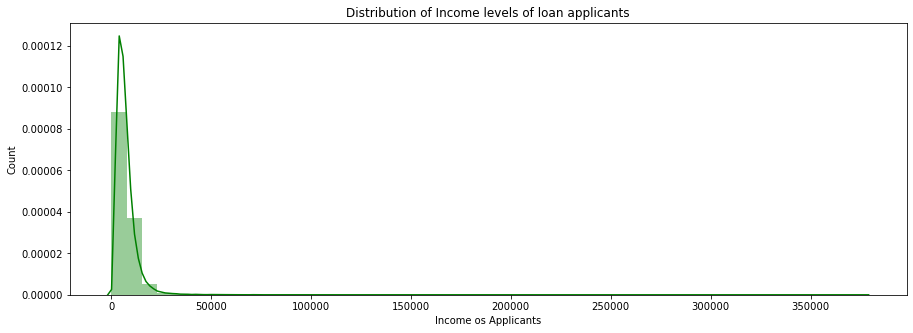

In [26]:
plt.figure(figsize=(15,5))
(sns.distplot(data1['income'],bins=50,kde=True,color = "green")).set(xlabel="Income os Applicants", ylabel = "Count", title='Distribution of Income levels of loan applicants')
plt.show()

**Inferences:**

The income ranges of loan applicants are in the range of 0 to 20000 per months

Text(0.5, 1.0, 'Visualization of age groups of loan applicants')

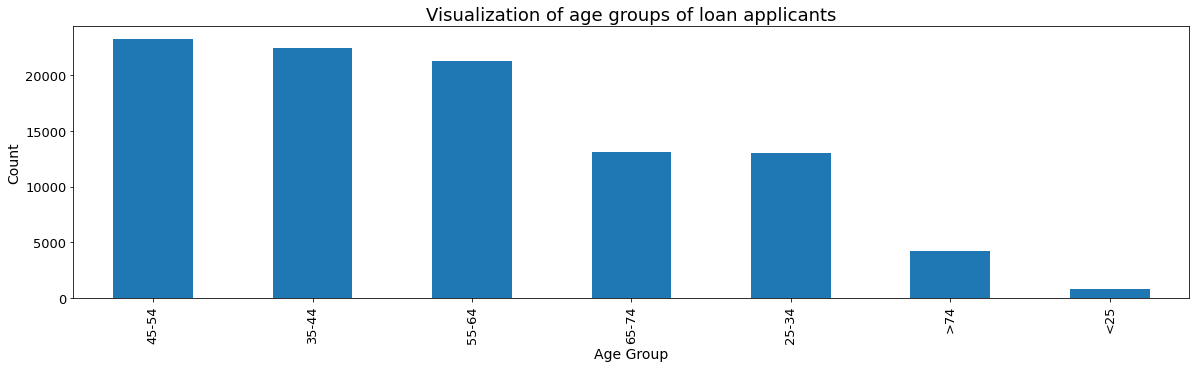

In [27]:
#displaying the distribution of age groups
data1['age'].value_counts().plot(figsize=(20, 5),kind='bar',fontsize=13)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualization of age groups of loan applicants',fontsize=18)

**Inferences:**

The age of the loan applicants are in the range of 45-54 followed by applicants are of the ages 35-44

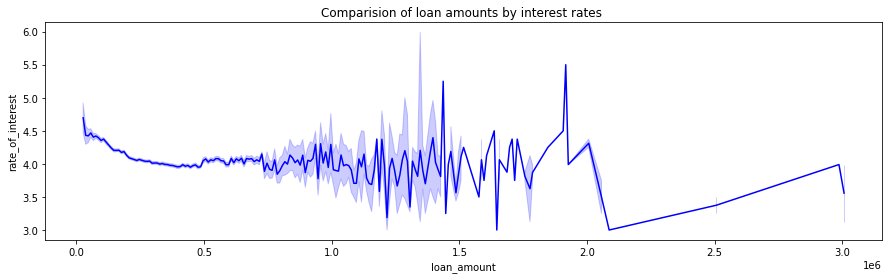

In [28]:
#displaying the comparision of loan amounts by interest rates 

plt.figure(figsize=(15,4))
sns.lineplot(x='loan_amount',y='rate_of_interest', data =data1, color = 'b')
plt.title('Comparision of loan amounts by interest rates ')
plt.show()

**Inferences:**

The is no steady interest rates. We can see that the interest rates floats with respect to the loan amounts.

Text(0.5, 1.0, 'Comaprision of Interest rates by Gender')

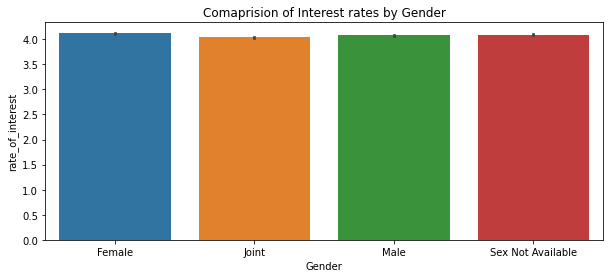

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(data1['Gender'],data1['rate_of_interest'])
plt.title('Comaprision of Interest rates by Gender')

**Inferences:**

We can infer that the interest rates for loan applications does not vary by gender.

Text(0.5, 1.0, 'Comaprision of loan amounts by Gender')

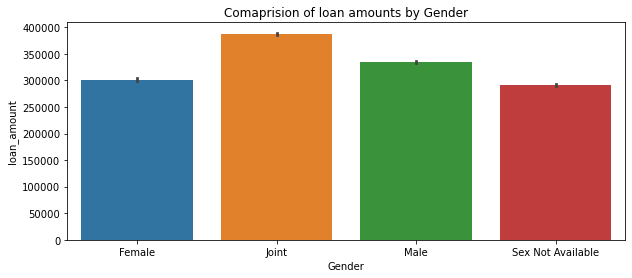

In [30]:
plt.figure(figsize=(10,4))
sns.barplot(data1['Gender'],data1['loan_amount'])
plt.title('Comaprision of loan amounts by Gender')

**Inferences:**

We can infer that the loan amount for joint loan applications are higher then followed by male applicants. 

Text(0.5, 1.0, 'Comparision of credit score by credit type')

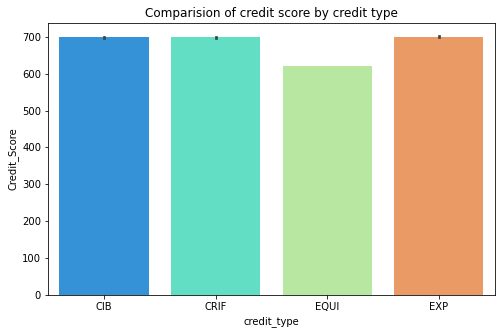

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='credit_type',y='Credit_Score',data=data1, palette='rainbow')
plt.title("Comparision of credit score by credit type")

**Inferences:**

The credit scores of the credit type CRIF is higher then followed by credit type EXP.

<Figure size 432x432 with 0 Axes>

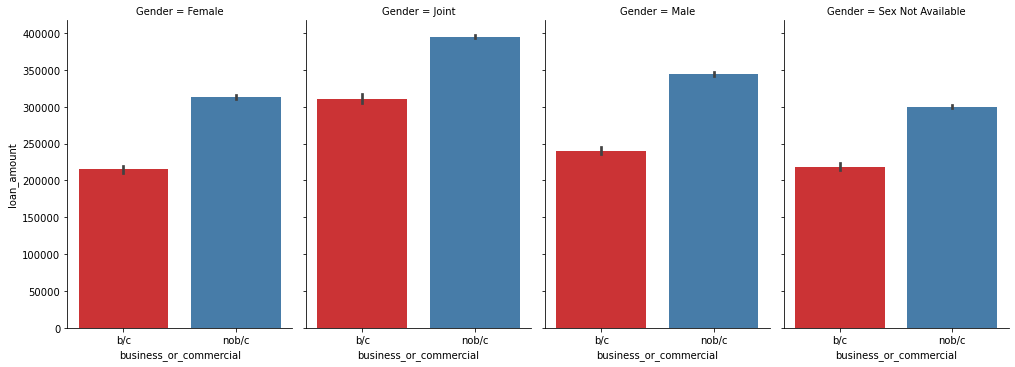

In [32]:
#Displaying the comaprision of loan amount by the gender of applicants type and nature of loan availability  
plt.figure(figsize=(6,6))
sns.catplot(x='business_or_commercial',y='loan_amount', col = 'Gender', data=data1,
                kind='bar', aspect=.7, palette='Set1')
#plt.title('comaprision of loan amount by the gender of applicants type and nature of loan availability')

**Inferences:**

We can infer that the most of the loan applicants are for commercial purposes in any ganders. We can also infer that there are male applicants for business purposes than females.

**Feature Engineering** 

##### Displaying the total null values in the primary dataframe

In [33]:
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [34]:
data.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [35]:
#Calculating percent of missing values for LTV
data['LTV'].isnull().sum()/len(data)

0.10155377682114751

> Inferences:
    
The LTV (Loan To Value column has 10% of missing values, which could be imputed. Any feature which his missing values higher than 30% will be dropped.)

In [36]:
#Calculating percent of missing values for age
data['age'].isnull().sum()/len(data)

0.0013452613170108294

In [37]:
#Calculating percent of missing values for submission_of_application
data['submission_of_application'].isnull().sum()/len(data)

0.0013452613170108294

In [38]:
#Calculating percent of missing values for property_value
data['property_value'].isnull().sum()/len(data)

0.10155377682114751

In [39]:
#Calculating percent of missing values for income
data['income'].isnull().sum()/len(data)

0.061545705253245445

In [40]:
#Calculating percent of missing values for loan_purpose
data['loan_purpose'].isnull().sum()/len(data)

0.0009013250823972557

In [41]:
#Calculating percent of missing values for Upfront_charges
data['Upfront_charges'].isnull().sum()/len(data)

0.2666442456447165

In [42]:
#Calculating percent of missing values for Interest_rate_spread
data['Interest_rate_spread'].isnull().sum()/len(data)

0.24644514696979888

In [43]:
#Calculating percent of missing values for loan_limit
data['loan_limit'].isnull().sum()/len(data)

0.022492769220421066

In [44]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [45]:
# Taking the columns that are used for further analysis and modelling as a new dataframe df

df=data[['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'Credit_Worthiness','open_credit','business_or_commercial','loan_amount','rate_of_interest','property_value',
         'construction_type','occupancy_type','total_units','income','credit_type','Credit_Score','age','Region','Status']]

In [46]:
df.head(5)

,loan_limit,Gender,approv_in_adv,loan_type,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,property_value,construction_type,occupancy_type,total_units,income,credit_type,Credit_Score,age,Region,Status
0,cf,Sex Not Available,nopre,type1,l1,nopc,nob/c,116500,NaN,118000.0,sb,pr,1U,1740.0,EXP,758,25-34,south,1
1,cf,Male,nopre,type2,l1,nopc,b/c,206500,NaN,NaN,sb,pr,1U,4980.0,EQUI,552,55-64,North,1
2,cf,Male,pre,type1,l1,nopc,nob/c,406500,4.56,508000.0,sb,pr,1U,9480.0,EXP,834,35-44,south,0
3,cf,Male,nopre,type1,l1,nopc,nob/c,456500,4.25,658000.0,sb,pr,1U,11880.0,EXP,587,45-54,North,0
4,cf,Joint,pre,type1,l1,nopc,nob/c,696500,4.00,758000.0,sb,pr,1U,10440.0,CRIF,602,25-34,North,0


In [47]:
df.nunique()

loan_limit                   2
Gender                       4
approv_in_adv                2
loan_type                    3
Credit_Worthiness            2
open_credit                  2
business_or_commercial       2
loan_amount                211
rate_of_interest           131
property_value             385
construction_type            2
occupancy_type               3
total_units                  4
income                    1001
credit_type                  4
Credit_Score               401
age                          7
Region                       4
Status                       2
dtype: int64

Checking whether the columns has appropriate data types

In [48]:
df.dtypes

loan_limit                 object
Gender                     object
approv_in_adv              object
loan_type                  object
Credit_Worthiness          object
open_credit                object
business_or_commercial     object
loan_amount                 int64
rate_of_interest          float64
property_value            float64
construction_type          object
occupancy_type             object
total_units                object
income                    float64
credit_type                object
Credit_Score                int64
age                        object
Region                     object
Status                      int64
dtype: object

Checking the null values to treat null values if any

In [49]:
df.isnull().sum()

loan_limit                 3344
Gender                        0
approv_in_adv               908
loan_type                     0
Credit_Worthiness             0
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest          36439
property_value            15098
construction_type             0
occupancy_type                0
total_units                   0
income                     9150
credit_type                   0
Credit_Score                  0
age                         200
Region                        0
Status                        0
dtype: int64

##### Imputng the missing values in the respective columns 

In [50]:
df = df.fillna(df.median())
df['loan_limit'].fillna(df['loan_limit'].mode()[0], inplace=True)
df['approv_in_adv'].fillna(df['approv_in_adv'].mode()[0], inplace=True)
df['age'].fillna(df['age'].mode()[0], inplace=True)

In [51]:
df.isnull().sum()

loan_limit                0
Gender                    0
approv_in_adv             0
loan_type                 0
Credit_Worthiness         0
open_credit               0
business_or_commercial    0
loan_amount               0
rate_of_interest          0
property_value            0
construction_type         0
occupancy_type            0
total_units               0
income                    0
credit_type               0
Credit_Score              0
age                       0
Region                    0
Status                    0
dtype: int64

> Inferences:
    
We could see that the all the columns are imputed without any missing values.

##### Outliers Treatment

<AxesSubplot:xlabel='income'>

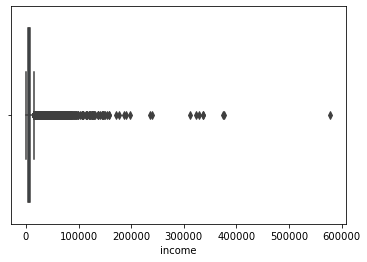

In [52]:
#Checking for outliers in income column
sns.boxplot(x=df['income'])

> Inferences:
    
The Income column has few outliers. Which needs to be removed for an effective model. So that the model with good predicting capacities can be built. 

<AxesSubplot:xlabel='loan_amount'>

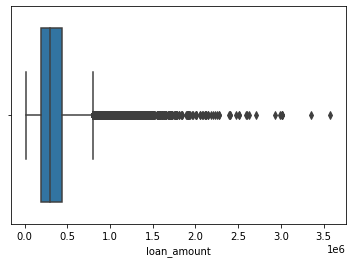

In [53]:
#Checking for outliers in loan_amount column
sns.boxplot(x=df['loan_amount'])

<AxesSubplot:xlabel='rate_of_interest'>

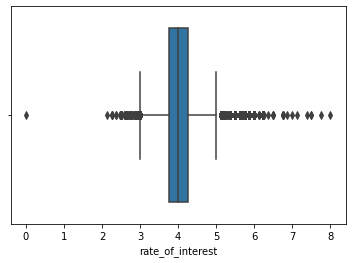

In [54]:
#Checking for outliers in rate_of_interest column
sns.boxplot(x=df['rate_of_interest'])

In [55]:
# taking all the numerical columns to a list for treating the outliers
list_col = ['loan_amount','rate_of_interest','property_value','income','Credit_Score']

##### Using Z-Scores to remove the outliers

###### Z-scores can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls.

In [56]:
#We use Z-score to describe the data point for determining the realtionship with standard deviation and the mean of the other datapoints
from scipy import stats
z=np.abs(stats.zscore(df[list_col]))

In [57]:
#printing Z-scores
print(z)

[[1.16697989 0.08575621 1.0870095  0.81644609 0.50235739]
 [0.6776066  0.08575621 0.20987016 0.30216412 1.27541323]
 [0.40988958 1.08144933 0.05327165 0.41211639 1.15823392]
 ...
 [0.62738881 1.85704181 0.69650717 0.00259557 0.01907994]
 [0.73198141 1.08914343 0.61920185 0.04069053 0.32112834]
 [0.40988958 0.70261946 0.19946154 0.05973801 1.12371411]]


In [58]:
tresh_z_score=3
#Creating another datframe after removing the outliers in the previous dataframe
df1=df[(z<tresh_z_score).all(axis=1)]

> Inferences:
    
    The Z-score greater than 3 is considered as an outlier, because in normal distribution  99.7% of the values are in the range of +3 or -3 of the standard deviation 
    

In [59]:
print("The shape of the old dataframe is:",df.shape)
print("The shape of the new dataframe is:",df1.shape)

The shape of the old dataframe is: (148670, 19)
The shape of the new dataframe is: (143235, 19)


> Inferences:

    We can see clearly that the outliers has been removed from the dataframe

In [60]:
df1.head(5)

,loan_limit,Gender,approv_in_adv,loan_type,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,property_value,construction_type,occupancy_type,total_units,income,credit_type,Credit_Score,age,Region,Status
0,cf,Sex Not Available,nopre,type1,l1,nopc,nob/c,116500,3.99,118000.0,sb,pr,1U,1740.0,EXP,758,25-34,south,1
1,cf,Male,nopre,type2,l1,nopc,b/c,206500,3.99,418000.0,sb,pr,1U,4980.0,EQUI,552,55-64,North,1
2,cf,Male,pre,type1,l1,nopc,nob/c,406500,4.56,508000.0,sb,pr,1U,9480.0,EXP,834,35-44,south,0
3,cf,Male,nopre,type1,l1,nopc,nob/c,456500,4.25,658000.0,sb,pr,1U,11880.0,EXP,587,45-54,North,0
4,cf,Joint,pre,type1,l1,nopc,nob/c,696500,4.00,758000.0,sb,pr,1U,10440.0,CRIF,602,25-34,North,0


Checking for class imbalance issues

In [61]:
df1['Status'].value_counts()

0    107762
1     35473
Name: Status, dtype: int64

> Inferences:
    
    We can see that the classes has imbalance issue and a specific class has low values/records. The class balancing issue can be solved by using various techniques suchas SMOOTE technique, resampling the target variable. Here, we'd choose resampling beacause this method is used to upsample or downsample the minority and majority classes, respectively. When working with an unbalanced dataset, we can use replacement to oversample the minority class. Oversampling is the term for this method. Undersampling is the process of randomly deleting rows from the majority class in order to match them with the minority class. We can generate a balanced dataset for both majority and minority classes after sampling the data. As a result, if both classes contain a similar amount of records in the dataset, we may expect that the classifier will treat them equally.

In [63]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df1[(df1['Status']==0)] 
df_minority = df1[(df1['Status']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples= 107762, random_state=42)  
df1 = pd.concat([df_minority_upsampled, df_majority])

##### Plotting the pairplot to determine the relationship between two varaibles

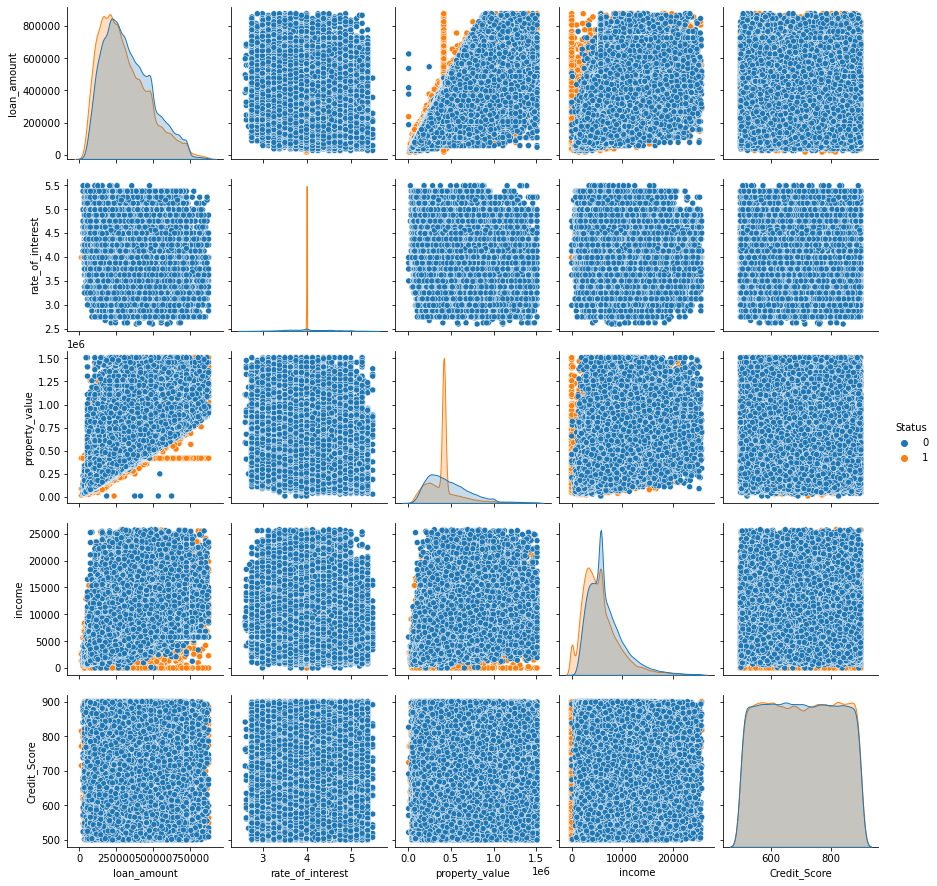

In [64]:
sns.pairplot(df1,hue='Status')

##### Seperating features and targets into X and y respectively

In [65]:
#Seperating the columns as target and features
x = [x for x in df1.columns if x != 'Status']
X=df1[x]
y= df1['Status']

##### Creating categories into columns as part of one-hot encoding

In [66]:
X=pd.get_dummies(X,drop_first=True)

In [67]:
X.head()

,loan_amount,rate_of_interest,property_value,income,Credit_Score,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,...,credit_type_EXP,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74,Region_North-East,Region_central,Region_south
66469,316500,3.99,318000.0,5580.0,886,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3544,156500,3.99,258000.0,11100.0,615,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
47475,106500,3.99,418000.0,2040.0,865,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
26480,636500,3.99,418000.0,9360.0,883,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
70672,386500,3.99,418000.0,11160.0,682,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


##### Plotting coorelation to check coorelation among various features

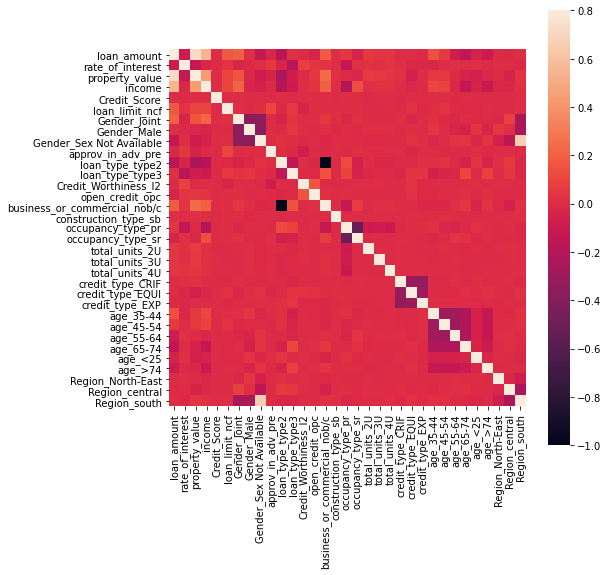

In [68]:
#visualization of correlation matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

##### Chi Square test to select the features having greater importance

In [69]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [70]:
X=X.astype(np.float64)

In [71]:
from sklearn.feature_selection import SelectKBest
chi2_test=SelectKBest(score_func=chi2, k=20)

In [73]:
chi2_model=chi2_test.fit(X,y)

In [74]:
chi2_model.scores_

array([1.26049601e+08, 1.65497078e+01, 5.26465118e+08, 9.66225648e+06,
       1.15634768e+02, 2.72593828e+02, 1.43872023e+03, 9.30075590e+01,
       6.04557728e+02, 3.89782130e+02, 1.88915788e+03, 1.44874257e+00,
       3.86293769e+02, 3.40429799e+01, 3.68809096e+02, 4.82959029e-02,
       2.19152367e+01, 9.12675732e+00, 1.76212013e+02, 7.60344828e+01,
       1.06187845e+01, 3.69431362e+03, 4.53180001e+04, 3.84203044e+03,
       2.40609943e+02, 1.85239527e+00, 6.01844481e+01, 1.09703221e+02,
       3.20267983e+01, 2.34312125e+02, 4.76703518e+01, 7.56544107e+01,
       2.43819923e+02])

In [75]:
#defining a function to list a feature against score
def chi2_scores(X,score):
    features=pd.DataFrame()
    for i in range(X.shape[1]):
        new=pd.DataFrame({"Features":X.columns[i],"Score":score[i]},index=[i])
        features=pd.concat([features,new])
    return features

In [76]:
chi_df=chi2_scores(X,chi2_model.scores_)

In [77]:
chi_df=chi_df.sort_values(['Score'], ascending=[False])

In [78]:
chi_df=chi_df.reset_index()
chi_df

,index,Features,Score
0,2,property_value,5.264651e+08
1,0,loan_amount,1.260496e+08
2,3,income,9.662256e+06
3,22,credit_type_EQUI,4.531800e+04
4,23,credit_type_EXP,3.842030e+03
5,21,credit_type_CRIF,3.694314e+03
6,10,loan_type_type2,1.889158e+03
7,6,Gender_Joint,1.438720e+03
8,8,Gender_Sex Not Available,6.045577e+02
9,9,approv_in_adv_pre,3.897821e+02


> Inferences:
    
    We can see that the scores of the respective features and taking 20 prime features into account and dropping the remaining features further

In [79]:
#Dropping the unimportant features
X.drop(['Region_central','Region_North-East','open_credit_opc','age_55-64','age_<25','occupancy_type_pr','rate_of_interest','total_units_4U','occupancy_type_sr','loan_type_type3','age_45-54','construction_type_sb'],axis=1,inplace=True)

##### Splitting the data into train & test data by using stratify parameter to handle class imbalance issue

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50,stratify=y)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 150,866
Test samples: 64,658


##### Plotting the coorelation matrix with the imortant features for our analysis further

<AxesSubplot:>

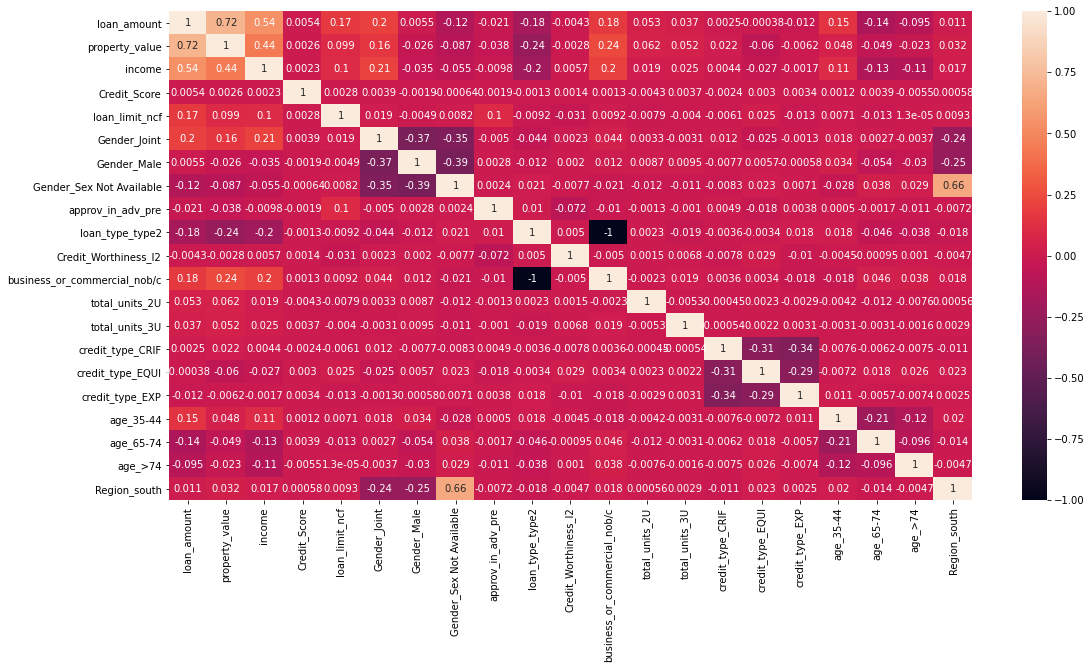

In [81]:
plt.figure(figsize=(18,9))
sns.heatmap(X.corr(),annot=True)

> Inferences:
    
    We can see that the columns such as property_value and loan_amount are highly coorelated and the columns such as business_or_commercial and loan_type has less coorelation

##### Creating the base pipeline with Standrad Scaler as our base pipeline

In [83]:
#Creating data pipeline with standard scaler imputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

processing_pipeline = Pipeline([('impute_missing', SimpleImputer(missing_values=0,strategy='median')),('scaler', StandardScaler())])
processing_pipeline

Pipeline(steps=[('impute_missing',
                 SimpleImputer(missing_values=0, strategy='median')),
                ('scaler', StandardScaler())])

#### Machine Learning

In [84]:
#importing the libraries required for logistic regression and evaluating the metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Logistic Regression

In [85]:
#creating the modelling pipeline from the data processing pipeline
modeling_pipeline = Pipeline([('data_processing', processing_pipeline),('lr', LogisticRegression(penalty='l2'))])
lr = modeling_pipeline.fit(X_train, y_train)

Inferences:
    
    Here, I've used Logistic Regression using l2 penalty

In [86]:
lr.classes_

array([0, 1], dtype=int64)

>Inferences:
    
    Printing the classes in target variable. Here, we can confirm that the clasess are 0 and 1 

In [87]:
#calculating the accuracy score on test data
predictions=lr.predict(X_test)
print("Test score:",accuracy_score(predictions, y_test))

Test score: 0.5641065297410993


In [88]:
#calculating the accuracy score on train data
predictions_train = lr.predict(X_train)
print("Training Score:",accuracy_score(predictions_train, y_train))

Training Score: 0.5651637877321597


>Inferences:
    
    Here, the training accuracy and test data accuracy are close to each other, so there is no case of over-fitting or under-fitting

### Metric Choosed: ROC AUC SCORE

**ROC AUC SCORE is used primarily for slightly imbalaned datasets. As our target variable has some degree of imbalance, it's goos to use ROC AUC score as our evalutaion metric.**

**The ROC AUC score gives us a score to determine how well the model has predicted the instances correctly**

**Since, we are working on a real estate domain, it's important that our model predicts number of correct instances, in order to future develop on the model and use it in pratical applications. Hence, ROC AUC Score is the best metric to determine the predictive power of the model**



In [89]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)

In [90]:
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.5804267771537737


>Inferences:
    The ROC AUC score for the model is 58%. That means our model is able to predict 58% of the instances correctly

Printing the confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[15131, 17198],
       [10986, 21343]], dtype=int64)

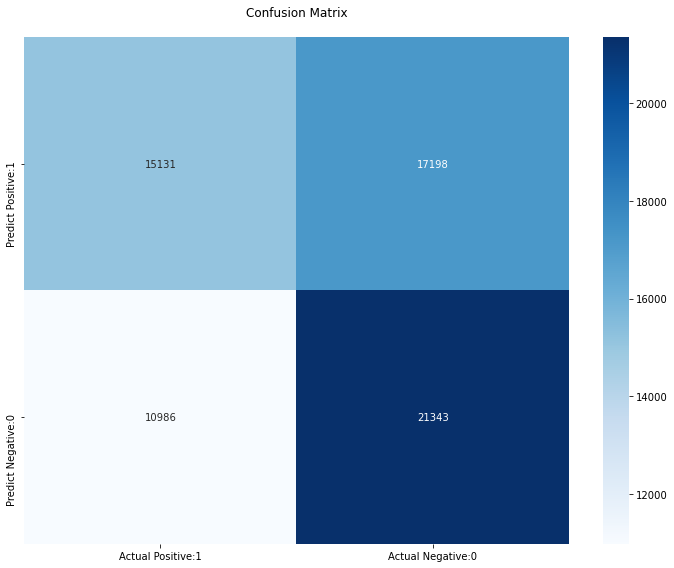

In [93]:

fig, ax = plt.subplots(figsize=(10,8))
cm_rf = confusion_matrix(y_test, predictions)
cm_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix\n")
plt.tight_layout()

In [94]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.47      0.58      0.52     26117
           1       0.66      0.55      0.60     38541

    accuracy                           0.56     64658
   macro avg       0.56      0.57      0.56     64658
weighted avg       0.58      0.56      0.57     64658



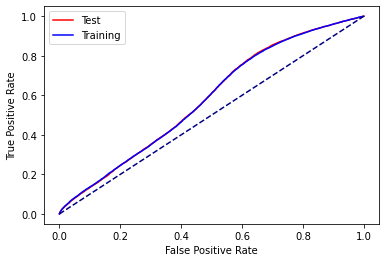

In [95]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=lr):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

>Inferences:
    
    The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate 
    the test.
    Here, the model is quiet good as the curve deviates from the diagonal.

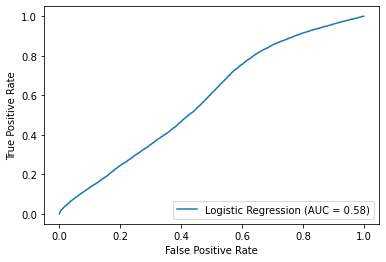

In [96]:
#Plotting the ROC_AUC_CURVE
from sklearn.metrics import roc_auc_score, plot_roc_curve
plot_roc_curve(lr, X_test,y_test,name='Logistic Regression')

>Inferences:
    
    ROC-AUC curve is an evaluation metric for binary classification problems that plots False positive rate against True positive rate. The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 58% that implies, the model is 58% accurate in distinguishing the classes.

##### Logistic Regression using 10 folds Grid Search Cross Validation at various regularization strengths and liblinear solver

**Metholoies to choose C hyper parameter:**
  
    Regularization is used to handle the problem of overfitting. If, the value of C is too large, it leads to over-fitting problem. And if the value of c is lower, results in under-fitting problem.
    
    So, it is best to have our model running at varios C values and find out the best regularization strength
    

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_lr = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(penalty='l2',solver='liblinear'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

lr = GridSearchCV(p_lr, param_grid=params, cv=10, scoring='roc_auc', refit=True)
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)

print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Validation score: 57.99%
Test score: 58.04%


>Inferences:
    
    Here, the Validation and test scores are comparable. Hence, there is no case for under-fitting or over-fitting

#### Printing ROC_AUC_SCORE

In [98]:
from sklearn.metrics import roc_auc_score
probabilities = lr.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.5804280458538956


##### Generating the ROC_AUC_CURVE

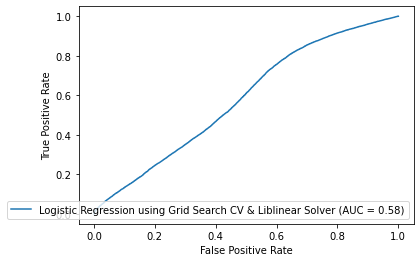

In [99]:
plot_roc_curve(lr, X_test,y_test, name='Logistic Regression using Grid Search CV & Liblinear Solver')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 58% that implies, the model is 58% accurate in distinguishing the classes.
    

##### Identifying the best hyper parameter

In [100]:
lr.best_params_

{'lr__C': 100}

In [101]:
lr.best_score_

0.579922411685556

>Inferences:
    
    The best ROC_AUC_CURVE score is 58% after running at various regularization strengths 
    using liblinear solver and at regularization strengt of 100.

##### Logistic Regression using 10 folds Grid Search Cross Validation at various regularization strengths and saga solver

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_lr = Pipeline([('processing', processing_pipeline),
             ('lr', LogisticRegression(solver='saga'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

lr = GridSearchCV(p_lr, param_grid=params, cv=10, scoring='roc_auc', refit=True)
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)

print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Validation score: 57.99%
Test score: 58.04%


>Inferences:
    
    Here, the Validation and test scores are comparable. Hence, there is no case for under-fitting or over-fitting

Calculating the ROC_AUC_SCORE

In [103]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
probabilities = lr.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.5804276487871154


##### Plotting the ROC_AUC_CURVE

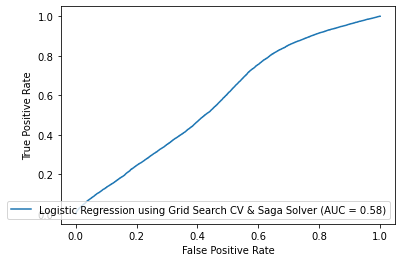

In [104]:
plot_roc_curve(lr, X_test,y_test, name='Logistic Regression using Grid Search CV & Saga Solver')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 58% that implies, the model is 58% accurate in distinguishing the classes.

Hence, Saga solver has not improved the performance of the model. Liblinear solver has achieved the better results.

In [105]:
lr.best_params_

{'lr__C': 10}

In [106]:
lr.best_score_

0.5799225522647886

>Inferences:
    
    The best ROC_AUC_CURVE score is 58% after running at various regularization strengths using 
    Saga Solver and at regularization strength of 10.

##### Logistic Regression using 10 folds Grid Search Cross Validation at various regularization strengths and saga solver and with using principle component analysis

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)

p_lr = Pipeline([('processing', processing_pipeline),("pca", pca),
             ('lr', LogisticRegression(solver='saga'))])

params = {'lr__C': [0.01, 0.1, 1, 10,100]}

lr = GridSearchCV(p_lr, param_grid=params, cv=10, scoring='roc_auc', refit=True)
lr = lr.fit(X_train, y_train)
lr_p = lr.predict(X_test)

print(f'Validation score: {lr.best_score_:.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Validation score: 57.99%
Test score: 58.04%


In [108]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
probabilities = lr.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.5804251314794074


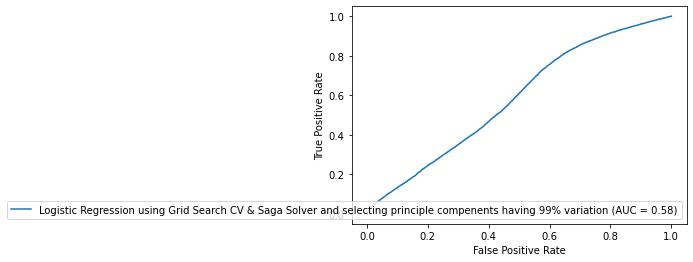

In [109]:
plot_roc_curve(lr, X_test,y_test, name='Logistic Regression using Grid Search CV & Saga Solver and selecting principle compenents having 99% variation')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 58% that implies, the model is 58% accurate in distinguishing the classes.

Hence, Saga solver has not improved the performance of the model. Liblinear solver has achieved the better results.

#### Using Decision Tree Classifier

In [110]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth = 10 , min_samples_split= 15)

p_dt = Pipeline([('processing', processing_pipeline),('model', model )])

pipe_final_n1=p_dt.fit(X_train,y_train)
predictions=pipe_final_n1.predict(X_test)

In [111]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
probabilities = p_dt.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.8043101576989372


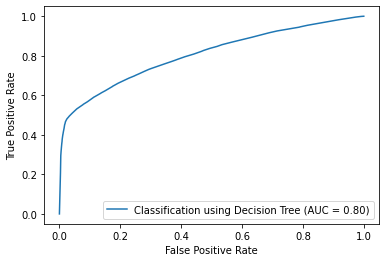

In [113]:
plot_roc_curve(p_dt, X_test,y_test, name='Classification using Decision Tree')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 80% that implies, the model is 80% accurate in distinguishing the classes.

#### Prediction uisng Decision Tree and Grid Search

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

p_dt = Pipeline([('processing', processing_pipeline),('dt', DecisionTreeClassifier())])
params = {'dt__max_depth': [1, 5, 10, 15, 25, 50, 100],'dt__min_samples_split': [3, 10, 15]}

dt = GridSearchCV(p_dt, param_grid=params, cv=10, scoring='roc_auc', refit=True)
dt = dt.fit(X_train, y_train)
dt_p = dt.predict(X_test)

print(f'Validation score: {dt.best_score_:.2%}')
print(f'accuracy score: {accuracy_score(dt_p, y_test):.2%}')

Validation score: 87.70%
accuracy score: 82.43%


In [115]:
probabilities = dt.predict_proba(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,probabilities[:,1]))

ROC AUC Score: 0.8844394385475345


In [116]:
dt.best_params_

{'dt__max_depth': 100, 'dt__min_samples_split': 10}

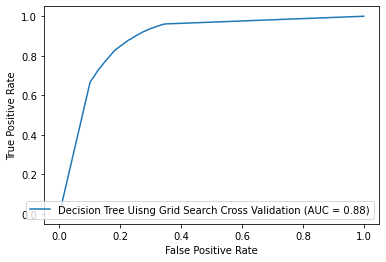

In [117]:
plot_roc_curve(dt, X_test,y_test, name='Decision Tree Uisng Grid Search Cross Validation')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 88% that implies, the model is 88% accurate in distinguishing the classes.

#### Prediction using Support Vector Machine

In [139]:
from sklearn.svm import SVC
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC())])

In [140]:
p_svm.fit(X_train, y_train)

Pipeline(steps=[('processing',
                 Pipeline(steps=[('impute_missing',
                                  SimpleImputer(missing_values=0,
                                                strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('clf', SVC())])

In [141]:
svm_p = p_svm.predict(X_test)

In [142]:

print("ROC AUC Score:",roc_auc_score(y_test,svm_p))

ROC AUC Score: 0.6734820130532958


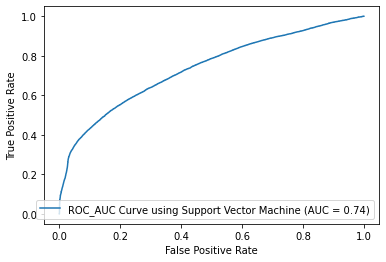

In [143]:
plot_roc_curve(p_svm, X_test,y_test, name='ROC_AUC Curve using Support Vector Machine')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 74 that implies, the model is 74% accurate in distinguishing the classes.

#### Prediction using K-Nearest Neighbours

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
p_knn= Pipeline([('processing', processing_pipeline),('clf', knn_model)])
p_knn.fit(X_train, y_train)

Pipeline(steps=[('processing',
                 Pipeline(steps=[('impute_missing',
                                  SimpleImputer(missing_values=0,
                                                strategy='median')),
                                 ('scaler', StandardScaler())])),
                ('clf', KNeighborsClassifier())])

In [124]:
knn_p = p_knn.predict(X_test)
print("ROC AUC Score:",roc_auc_score(y_test,knn_p))

ROC AUC Score: 0.7524977574314085


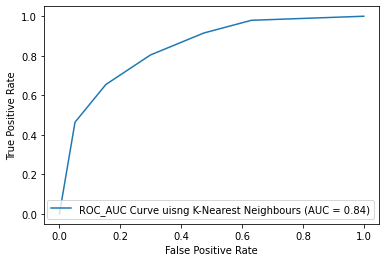

In [125]:
plot_roc_curve(p_knn, X_test,y_test, name='ROC_AUC Curve uisng K-Nearest Neighbours')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 84% that implies, the model is 84% accurate in distinguishing the classes.

#### Classification using Ensemble Methods

In [126]:
from sklearn.ensemble import VotingClassifier

In [127]:
models = list()
p_svm= Pipeline([('processing', processing_pipeline),('clf', SVC(probability=True))])
models.append(('logistic_regression',p_lr))
models.append(('decison_tree',p_dt))
models.append(('knn',p_knn))

In [128]:
ensemble=VotingClassifier(estimators=models,voting='soft')

In [129]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
scores=cross_val_score(estimator=ensemble, X=X_train, y=y_train, cv=cv, scoring='roc_auc',n_jobs=-1)

In [130]:
print(f'ROC_AUC Scores {scores.mean():.2f} (+/- {scores.std():.2f})')

ROC_AUC Scores 0.92 (+/- 0.00)


>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 92% that implies, the model is 92% accurate in distinguishing the classes.

#### Classifocation Using Adaboost Model

In [133]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pp = processing_pipeline.fit_transform(X_train)

params = {'base_estimator__max_depth': [1,2],'n_estimators': [50, 100, 200, 400]}
ABC = AdaBoostClassifier(DecisionTreeClassifier())
ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='roc_auc')
ad_gscv = ad_gscv.fit(pp, y_train)
print(f'Validation score: {ad_gscv.best_score_:.2%}')
xtt = processing_pipeline.transform(X_test)
ad_pred = ad_gscv.predict(xtt)
print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 81.13%
Test score: 81.22%


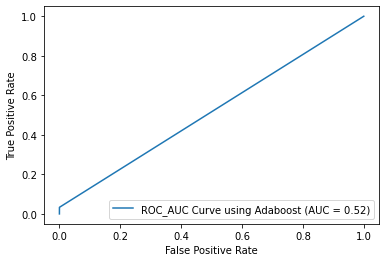

In [134]:
plot_roc_curve(ad_gscv, X_test,y_test, name='ROC_AUC Curve using Adaboost')

>Inferences:
    
    The Area Under the Curve (AUC) value determines the ability of the classifier to distinguish between the classes. Here, the AUC value is 52% that implies, the model is 52% accurate in distinguishing the classes.